In [23]:
import os, sys
import polars as pl
import numpy as np
from db_robust_clust.plots import clustering_MDS_plot_multiple_methods
import seaborn as sns
sns.set_style('whitegrid')

In [24]:
DATA_ID = 'simulation_1' 

project_path = os.path.abspath(os.path.join(os.getcwd(), '..', '..', '..')) 
results_dir = os.path.join(project_path, 'results', 'experiment_5', DATA_ID)
filename = f'results_exp_5_{DATA_ID}.pkl'
results_path = os.path.join(results_dir, filename)

sys.path.append(project_path)

from src.utils.experiments_exploration_utils import process_experiment_5_results, plot_experiment_5_results, fast_mds
from src.utils.simulations_utils import generate_simulation
from config.config_simulations import SIMULATION_CONFIGS
from config.config_experiment_5 import CONFIG_EXPERIMENT, N_REALIZATIONS, PROP_ERRORS_THRESHOLD

simulation_config = SIMULATION_CONFIGS[DATA_ID]
config_experiment = CONFIG_EXPERIMENT[DATA_ID]

In [25]:
df, df_avg, not_feasible_methods, results = process_experiment_5_results(
    results_path=results_path, 
    not_feasible_methods_to_add=['Spectral-Clustering'],
    prop_errors_threshold=PROP_ERRORS_THRESHOLD
)

df_avg = df_avg.with_columns(
    pl.col('model_name').replace({'KMedoids-euclidean': 'KMedoids-pam'})
)

✅ Archivo cargado correctamente. Tipo de objeto: <class 'dict'>
📊 Número de realizaciones (seeds) capturadas: 100


In [26]:
df

random_state,model_name,time,adj_accuracy,ARI,status,status_error
i64,str,f64,f64,f64,str,bool
6863,"""KMeans""",0.497759,0.724571,0.668436,"""OK""",false
6863,"""CLARA""",0.092904,0.725914,0.668992,"""OK""",false
6863,"""Diana""",42.212178,0.487971,0.317201,"""OK""",false
6863,"""LDAKmeans""",8.441397,0.7254,0.670535,"""OK""",false
6863,"""SubKmeans""",0.882383,0.724571,0.668436,"""OK""",false
…,…,…,…,…,…,…
30032,"""FoldFastKmedoidsGGower-robust_…",15.847345,0.864771,0.690803,"""OK""",false
30032,"""FastKmedoidsGGower-robust_maha…",17.364942,0.865457,0.689978,"""OK""",false
30032,"""FoldFastKmedoidsGGower-robust_…",16.383738,0.872229,0.705861,"""OK""",false


In [27]:
df_avg

model_name,mean_ari,mean_adj_accuracy,mean_time,std_ari,std_adj_accuracy,std_time,prop_status_error
str,f64,f64,f64,f64,f64,f64,f64
"""FoldFastKmedoidsGGower-robust_…",0.752012,0.888843,22.843773,0.109649,0.060864,6.216831,0.0
"""FoldFastKmedoidsGGower-robust_…",0.741201,0.884982,22.728664,0.110318,0.058405,6.09416,0.0
"""FoldFastKmedoidsGGower-robust_…",0.727507,0.876641,21.964127,0.113159,0.065658,5.882043,0.0
"""MiniBatchKMeans""",0.764349,0.857945,0.51653,0.119469,0.110275,0.595529,0.0
"""FoldFastKmedoidsGGower-robust_…",0.67919,0.844013,20.75865,0.150355,0.08975,5.543618,0.0
…,…,…,…,…,…,…,…
"""GaussianMixture""",0.554323,0.640624,0.858285,0.132983,0.108027,0.521968,0.0
"""SpectralBiclustering""",0.504708,0.621654,21.312527,0.14583,0.11331,12.715697,0.0
"""SubKmeans""",0.462495,0.543375,0.638045,0.141592,0.124698,0.540766,0.0


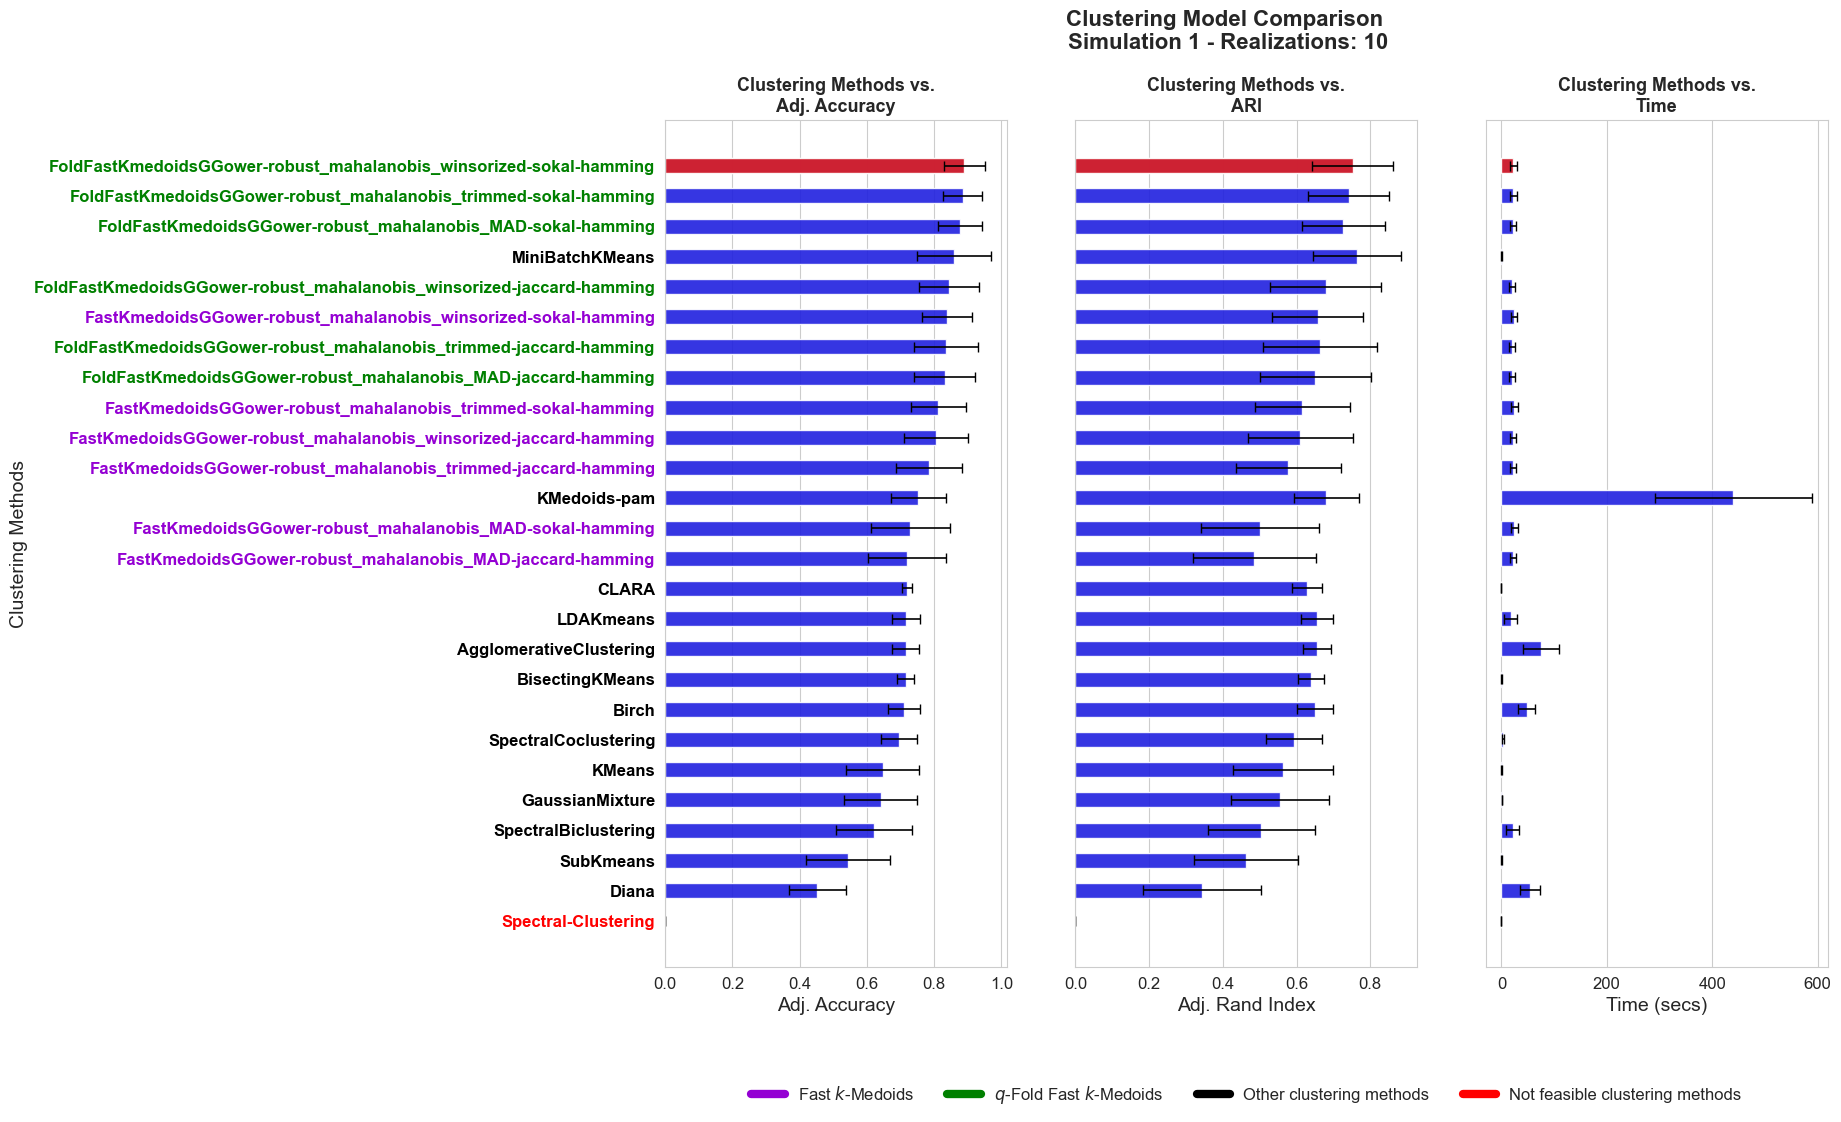

In [28]:
model_names = df_avg['model_name'].unique().to_list()
our_methods_1 = [x for x in model_names if 'Fast' in x and 'Fold' not in x] # Fast k-medoids
our_methods_2 = [x for x in model_names if 'Fast' in x and 'Fold' in x] # q-Fold Fast k-medoids
other_methods = [x for x in model_names if x not in our_methods_1 + our_methods_2 and x not in not_feasible_methods]
plot_filename = f'plot_results_exp_5_{DATA_ID}.png'
save_path = os.path.join(results_dir, plot_filename)

plot_experiment_5_results(
    df_avg = df_avg, 
    data_name = DATA_ID, 
    num_realizations = N_REALIZATIONS, 
    save_path = save_path, 
    our_methods_1=our_methods_1, our_methods_2=our_methods_2, 
    other_methods=other_methods, not_feasible_methods=not_feasible_methods)

In [33]:
random_state_mds = 35084  

d1 = 'robust_mahalanobis'
d2 = 'jaccard'
d3 = 'hamming'
robust_method = 'trimmed'

X, y, outliers_idx = generate_simulation(
    random_state = random_state_mds,
    n_samples = simulation_config['n_samples'],
    centers = simulation_config['centers'],
    cluster_std = simulation_config['cluster_std'],
    n_features = simulation_config['n_features'],
    outlier_configs = simulation_config['outlier_configs'],
    custom_sampling = False,  
    return_outlier_idx=True
)

X_mds, sample_idx = fast_mds(
    sample_size=500, 
    X=X, 
    d1=d1, d2=d2, d3=d3, robust_method=robust_method, 
    random_state=random_state_mds, 
    config_experiment=config_experiment
)

outliers_bool = np.array([0 if x not in outliers_idx else 1 for x in range(0, len(X))])

sorted_methods_accuracy = df_avg['model_name'].to_list()

our_methods_1_sorted_acc = [x for x in list(sorted_methods_accuracy) if x in our_methods_1]
our_methods_2_sorted_acc = [x for x in list(sorted_methods_accuracy) if x in our_methods_2]
other_methods_sorted_acc = [x for x in list(sorted_methods_accuracy) if x in other_methods]
best_our_methods_1 = our_methods_1_sorted_acc[0]
best_our_methods_2 = our_methods_2_sorted_acc[0]
best_other_methods = other_methods_sorted_acc[0]
additional_methods = ['KMeans', 'KMedoids-euclidean']

methods_to_plot = [best_our_methods_1, best_our_methods_2, best_other_methods] + additional_methods
names_to_plot = [('Best Fast k-medoids' if x in our_methods_1 else 'Best q-Fold Fast k-medoids' if x in our_methods_2 else x) for x in methods_to_plot]
names_to_plot = dict(zip(methods_to_plot, names_to_plot))
names_to_plot.update({'KMedoids-euclidean': 'KMedoids-pam'})
y_pred_dict = {names_to_plot[method]: results[random_state_mds]['adj_labels'][method][sample_idx] for method in methods_to_plot}
accuracy_dict = {names_to_plot[method]: results[random_state_mds]['adj_accuracy'][method] for method in methods_to_plot}
time_dict = {names_to_plot[method]: results[random_state_mds]['time'][method] for method in methods_to_plot}

c:\Users\fscielzo\Documents\PhD\paper-2\paper-code\.venv\Lib\site-packages\sklearn\manifold\_mds.py:677: FutureWarning: The default value of `n_init` will change from 4 to 1 in 1.9.
  warnings.warn(


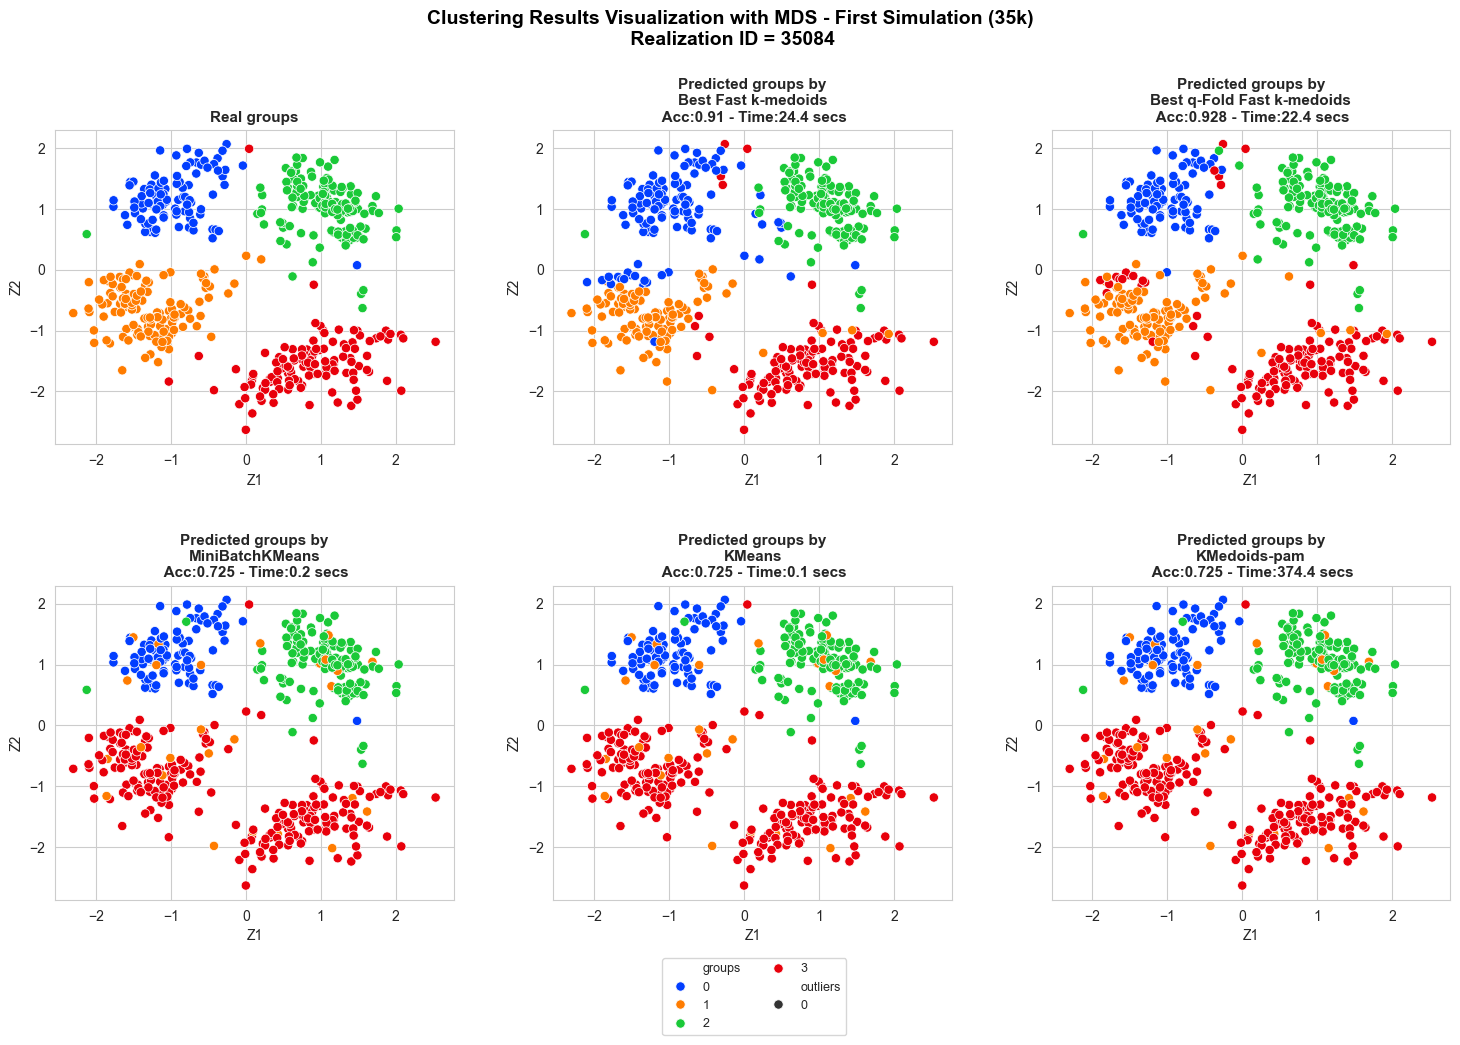

In [34]:
plot_filename = f'mds_plot_results_exp_5_{DATA_ID}.png'
save_path = os.path.join(results_dir, plot_filename)

clustering_MDS_plot_multiple_methods(X_mds=X_mds, y_pred=y_pred_dict, 
                                     y_true=y[sample_idx],
                                     title=f"Clustering Results Visualization with MDS - First Simulation (35k)\n Realization ID = {random_state_mds}", 
                                     accuracy=accuracy_dict, time=time_dict, n_rows=2,
                                     figsize=(18,10), bbox_to_anchor=(0.75,-1.9), 
                                     title_size=14, title_weight='bold', 
                                     subtitles_size=11,
                                     points_size=45, title_height=1, 
                                     wspace=0.25, hspace=0.45, 
                                     outliers_boolean=outliers_bool[sample_idx],
                                     n_cols_legend=2, legend_title='', legend_size=9, 
                                     save = True, file_name = save_path
)
